# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import warnings
from sklearn.metrics import r2_score

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
for df in [df0, df1, df2]:
    display(df.head())
    display(df.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

In [4]:
df0 = df0.drop(['id'], axis=1)
display(df0.duplicated().sum())
df0.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [5]:
df1 = df1.drop(['id'], axis=1)
display(df1.duplicated().sum())
df1.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [6]:
df2 = df2.drop(['id'], axis=1)
display(df2.duplicated().sum())
df2.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


Данные полные, отстутствуют дубликаты

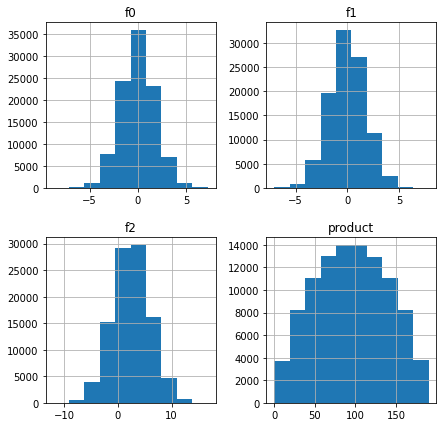

In [7]:
df.hist(figsize=(7, 7))
plt.show()

Аномалии вроде бы тоже отсуствуют

In [8]:
features0 = df0.drop(['product'], axis=1)
target0 = df0['product']

In [9]:
features1 = df1.drop(['product'], axis=1)
target1 = df1['product']

In [10]:
features2 = df2.drop(['product'], axis=1)
target2 = df2['product']

In [11]:
features_train0, features_valid0, target_train0, target_valid0 = train_test_split(
    features0, target0, test_size=0.25, random_state=12345)
print(features_train0.shape)
print(target_valid0.shape)
print('if the latter is 3 times smaller than the former, the division is done correctly')


(75000, 3)
(25000,)
if the latter is 3 times smaller than the former, the division is done correctly


In [12]:
features_train1, features_valid1, target_train1, target_valid1 = train_test_split(
    features1, target1, test_size=0.25, random_state=12345)
print(features_train1.shape)
print(target_valid1.shape)
print('if the latter is 3 times smaller than the former, the division is done correctly')

(75000, 3)
(25000,)
if the latter is 3 times smaller than the former, the division is done correctly


In [13]:
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=12345)
print(features_train2.shape)
print(target_valid2.shape)
print('if the latter is 3 times smaller than the former, the division is done correctly')

(75000, 3)
(25000,)
if the latter is 3 times smaller than the former, the division is done correctly


### данные чистые, без дубликатов или пропусков

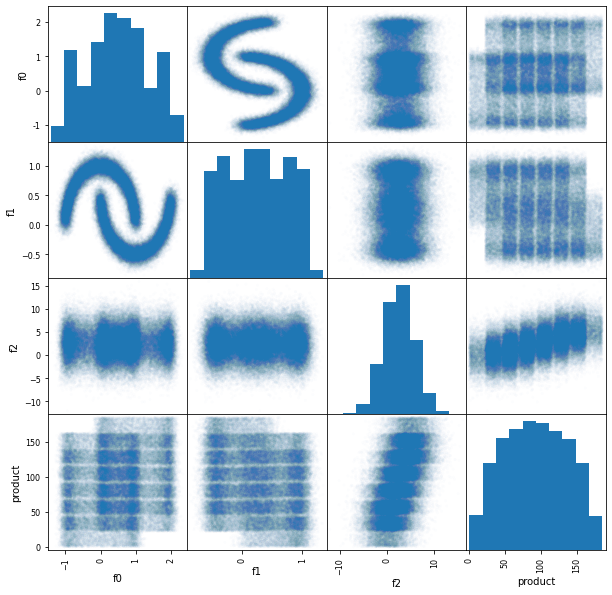

In [14]:
pd.plotting.scatter_matrix(df0, alpha=0.01, figsize=(10, 10))
plt.show()

## Обучение и проверка модели

In [15]:
numeric = ['f0', 'f1', 'f2']

In [16]:
warnings.filterwarnings('ignore')

scaler = StandardScaler()
scaler.fit(features_train2[numeric])
features_train0[numeric] = scaler.transform(features_train0[numeric])
features_valid0[numeric] = scaler.transform(features_valid0[numeric])
features0.head()

,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769


In [17]:
scaler = StandardScaler()
scaler.fit(features_train2[numeric])
features_train1[numeric] = scaler.transform(features_train1[numeric])
features_valid1[numeric] = scaler.transform(features_valid1[numeric])
features1.head()

,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363


In [18]:
scaler = StandardScaler()
scaler.fit(features_train2[numeric])
features_train2[numeric] = scaler.transform(features_train2[numeric])
features_valid2[numeric] = scaler.transform(features_valid2[numeric])
features2.head()

,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011


In [19]:
model0 = LinearRegression()
model0.fit(features_train0, target_train0)

LinearRegression()

In [20]:
model1 = LinearRegression()
model1.fit(features_train1, target_train1)

LinearRegression()

In [21]:
model2 = LinearRegression()
model2.fit(features_train2, target_train2)

LinearRegression()

In [22]:
predicted_valid0 = model0.predict(features_valid0)
mse = mean_squared_error(target_valid0, predicted_valid0)
rmse0 = mse ** 0.5
rmse0

37.5794217150813

In [41]:
predicted_valid0

array([ 95.89495185,  77.57258261,  77.89263965, ...,  61.50983303,
       118.18039721, 118.16939229])

In [24]:
predicted_valid1 = model1.predict(features_valid1)
mse = mean_squared_error(target_valid1, predicted_valid1)
rmse1 = mse ** 0.5
rmse1

0.893099286775617

In [25]:
predicted_valid2 = model2.predict(features_valid2)
mse = mean_squared_error(target_valid2, predicted_valid2)
rmse2 = mse ** 0.5
rmse2

40.02970873393434

In [26]:
r2 = r2_score(target_valid0, predicted_valid0)
r2

0.27994321524487786

In [27]:
r2 = r2_score(target_valid1, predicted_valid1)
r2

0.9996233978805127

In [28]:
r2 = r2_score(target_valid2, predicted_valid2)
r2

0.20524758386040443

In [29]:
print('средний запас сырья:', predicted_valid0.mean(), '\nнастоящий средний запас сырья:', target_valid0.mean(), '\nrmse модели:', rmse0)

средний запас сырья: 92.59256778438035 
настоящий средний запас сырья: 92.07859674082927 
rmse модели: 37.5794217150813


In [30]:
print('средний запас сырья:', predicted_valid1.mean(), '\nнастоящий средний запас сырья:', target_valid1.mean(), '\nrmse модели:', rmse1)

средний запас сырья: 68.72854689544602 
настоящий средний запас сырья: 68.72313602435997 
rmse модели: 0.893099286775617


In [31]:
print('средний запас сырья:', predicted_valid2.mean(), '\nнастоящий средний запас сырья:', target_valid2.mean(), '\nrmse модели:', rmse2)

средний запас сырья: 94.96504596800489 
настоящий средний запас сырья: 94.88423280885438 
rmse модели: 40.02970873393434


Ну вроде как результат неплохой, модель правильно обучилась

## Подготовка к расчёту прибыли

In [32]:
INVEST = 10**7
PRICE_PP = 450

все единицы в тысячах, для более удобных рассчетов, price_pp -> price per point (тыс баррелей)

In [33]:
profitable_amount = INVEST / PRICE_PP
print('profitable_amount to develop a site', round(profitable_amount, 2), 'profitable to develop per oil well', round(profitable_amount/200, 2))

profitable_amount to develop a site 22222.22 profitable to develop per oil well 111.11


выходит, что для безубыточного бурения нужно 2222.23 тыс баррелей получить

In [34]:
avg0 = df0['product'].mean()
avg1 = df1['product'].mean()
avg2 = df2['product'].mean()
print(avg0, avg1, avg2)

92.50000000000001 68.82500000000002 95.00000000000004


получается что любой из регионов в среднем будет неприбыльным, если не брать только лучшие скважины

## Расчёт прибыли и рисков 

In [35]:
def count_profit(model, features, target):
    predicted_valid = model.predict(features)
    
    matrix = pd.DataFrame({'pred': predicted_valid, 'true': target})
    matrix = matrix.sort_values(by='pred', ascending=False)
    best200 = matrix.head(200)
    predicted_200_true = best200['true']

    return round(sum(predicted_200_true) * 450 )


In [36]:
def quant(values):
    lower = round(np.quantile(values, 0.025))
    upper = round(np.quantile(values, 0.975))
    return f"95% confidence interval: {lower}, {upper}"

In [37]:
state = np.random.RandomState(12345)
values0 = []
values1 = []
values2 = []
for i in range(1000):
    
    subsample = features_valid0.sample(n=500, replace=True, random_state=state)
    target = target_valid0.loc[subsample.index]
    gross = count_profit(model0, subsample, target)
    net = gross - (10**7)
    values0.append(net)
                                        
    subsample = features_valid1.sample(n=500, replace=True, random_state=state)
    target = target_valid1.loc[subsample.index]
    gross = count_profit(model1, subsample, target)
    net = gross - (INVEST)
    values1.append(net)
                                        
    subsample = features_valid2.sample(n=500, replace=True, random_state=state)
    target = target_valid2.loc[subsample.index]
    gross = count_profit(model2, subsample, target)
    net = gross - (INVEST)
    values2.append(net)


In [38]:
integer_array = np.array(values0)
threshold = np.sum(integer_array < 0)
mean = integer_array.mean()
if threshold > 75:
    print('loss chance:', threshold/10,'%, this region df0 isnt optimal for digging wells')
else:
    print('df0 is suitable for digging wells\n', mean,
          'is the mean net profit for this region\n loss chance:', threshold/10, '%\n',
          quant(values0)
         )
    

loss chance: 8.3 %, this region df0 isnt optimal for digging wells


In [39]:
integer_array = np.array(values1)
threshold = np.sum(integer_array < 0)
mean = integer_array.mean()
if threshold > 75:
    print('loss chance:', threshold/10,'%, this region df1 isnt optimal for digging wells')
else:
    print('df1 is suitable for digging wells\n', mean,
          'is the mean net profit for this region\n loss chance:', threshold/10, '%\n',
          quant(values1)
         )

df1 is suitable for digging wells
 455016.069 is the mean net profit for this region
 loss chance: 1.5 %
 95% confidence interval: 48072, 848710


In [40]:
integer_array = np.array(values2)
threshold = np.sum(integer_array < 0)
mean = integer_array.mean()
if threshold > 75:
    print('loss chance:', threshold/10,'%, this region df2 isnt optimal for digging wells')
else:
    print('df2 is suitable for digging wells\n', mean,
          'is the mean net profit for this region\n loss chance:', threshold/10, '%\n',
          quant(values2)
         )

loss chance: 9.0 %, this region df2 isnt optimal for digging wells


## Вывод

Получается, что 2 регион является наиболее оптимальным для добычи нефти <2.5% вероятности уйти в убыток, там наименее прибыльные в среднем месторождения, но видимо большой разброс, есть много с малым количеством, но есть и большим, чем в других регионах  
и из всех 3 по бутстрапу получается наилучшим